In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns
import random

In [4]:
data= pd.read_csv('final data_2.csv')

In [11]:
data.shape

(149, 29)

In [3]:
data.head()

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,...,546.45,555.11,563.29,571.08,578.52,10.00,401,501,0.5,0.003
0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,...,544.90,553.54,561.72,569.51,576.95,10.0,402,502,0.508163,0.003061
1,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,...,543.40,552.02,560.19,567.98,575.42,10.0,403,503,0.516327,0.003122
2,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,...,541.95,550.55,558.71,566.48,573.93,10.0,404,504,0.524490,0.003184
3,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,...,540.54,549.12,557.26,565.03,572.48,10.0,405,505,0.532653,0.003245
4,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,...,539.17,547.73,555.86,563.62,571.07,10.0,406,506,0.540816,0.003306


In [5]:
x_input= data.iloc[:,0:25]
y_output= data.iloc[:, [25,26,27,28]]


### Spliting data

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x_input,y_output,test_size=0.2,random_state=2)

### Scaling data

In [7]:
scaler_x = StandardScaler()
scaler_y= StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)
y_train_scaled= scaler_y.fit_transform(y_train)
y_test_scaled= scaler_y.transform(y_test)


In [8]:
x_train_scaled

array([[ 0.        ,  0.        ,  0.        , ...,  0.51635617,
         0.49694258, -0.62764557],
       [ 0.        ,  0.        ,  0.        , ...,  0.34054814,
         0.35573658,  1.37476255],
       [ 0.        ,  0.        ,  0.        , ..., -1.08563286,
        -1.07769866, -0.82788639],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.32354876,
        -1.31800796, -0.82788639],
       [ 0.        ,  0.        ,  0.        , ...,  0.89984769,
         0.89788989, -0.62764557],
       [ 0.        ,  0.        ,  0.        , ..., -1.1191514 ,
        -1.11105696, -0.82788639]])

In [9]:
y_train_scaled

array([[ 1.75042847,  1.23291039,  1.24425465,  1.24425494],
       [-0.53550844,  0.23358116, -0.64684761, -0.6468479 ],
       [-1.33759157, -1.61702854, -0.64684761, -0.6468479 ],
       [-0.13446688, -0.50666272,  1.45437713,  1.45437684],
       [ 1.67022016,  1.15888601,  1.104173  ,  1.10417329],
       [ 0.22647053,  0.93681284,  0.68392805,  0.68392834],
       [ 1.18897028,  0.71473968,  0.26368311,  0.26368339],
       [ 1.54990769,  1.04784942,  0.89405052,  0.89405024],
       [ 0.94834534,  0.49266651, -0.15656184, -0.15656155],
       [ 0.58740794,  1.26992259,  1.31429547,  1.31429519],
       [ 1.34938691,  0.86278845,  0.5438464 ,  0.54384669],
       [-1.45790403, -1.72806512, -0.85697009, -0.8569698 ],
       [-1.09696663, -0.28458956, -1.62741916, -1.62741944],
       [-0.77613338, -1.09885783,  0.33372393,  0.33372364],
       [-0.41519597,  0.34461774, -0.43672514, -0.43672485],
       [-1.89904975, -2.13519926, -1.62741916, -1.62741944],
       [-0.81623753, -1.

### Model

In [10]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=25))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense (4, activation= 'relu'))

model.summary()

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,220 (59.45 KB)

 Trainable params: 14,740 (57.58 KB)

 Non-trainable params: 480 (1.88 KB)

### Compiling

In [12]:
adam = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [90]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [13]:
history = model.fit(x_train_scaled,y_train_scaled,validation_data=(x_test_scaled,y_test_scaled),epochs=300)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - accuracy: 0.1526 - loss: 1.7146 - val_accuracy: 0.2000 - val_loss: 1.0524
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1823 - loss: 1.7262 - val_accuracy: 0.2000 - val_loss: 1.0501
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2394 - loss: 1.7358 - val_accuracy: 0.1000 - val_loss: 1.0482
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2899 - loss: 1.4172 - val_accuracy: 0.1000 - val_loss: 1.0474
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2012 - loss: 1.5624 - val_accuracy: 0.0333 - val_loss: 1.0460
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3207 - loss: 1.4131 - val_accuracy: 0.0000e+00 - val_loss: 1.0449
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2963 - loss: 1.3828 - val_accuracy: 0.1667 - val_loss: 1.0443
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2093 - loss: 1.4734 - val_accuracy: 0.1667 - val_

In [14]:
y_predicted_scaled= model.predict(x_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


In [15]:
y_predicted_scaled

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.06660665, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.07881078, 0.20476931, 0.        , 0.        ],
       [0.7286361 , 0.93327415, 0.90758175, 0.905861  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.19280875, 0.3563107 , 0.14557323, 0.11604998],
       [0.        , 0.        , 0.        , 0.        ],
       [0.32986403, 0.51761234, 0.32989496, 0.3344778 ],
       [0.9651238 , 0.7826042 , 0.5760691 , 0.54711074],
       [0.        , 0.        , 0.        , 0.        ],
       [1.2238741 , 1.0059903 ,

In [16]:
actual_y_predicted= scaler_y.inverse_transform(y_predicted_scaled)

In [ ]:
actual_y_predicted

In [ ]:
y_test

In [19]:
actual_output= pd.DataFrame(y_test)
predicted_output= pd.DataFrame(actual_y_predicted)
with pd.ExcelWriter('tables.xlsx') as writer:
    actual_output.to_excel(writer, sheet_name='Sheet1', index=False)
    predicted_output.to_excel(writer, sheet_name='Sheet2', index=False)

In [20]:
comparison= pd.read_csv('comparison.csv')

In [32]:
comparison

,A_actual,A_pred,B_actual,B_pred,n_actual,n_pred,C_actual,C_pred
0,437,449.352936,567,559.689087,0.630612,0.697839,0.003980,0.004484
1,450,450.379791,550,566.598267,0.900000,0.830851,0.006000,0.005471
2,405,449.352936,505,559.689087,0.532653,0.697839,0.003245,0.004484
3,444,449.352936,544,562.185608,0.851020,0.797219,0.005633,0.005220
4,448,449.352936,578,559.689087,0.720408,0.697839,0.004653,0.004484
5,426,449.352936,526,559.689087,0.704082,0.697839,0.004531,0.004484
6,430,449.352936,560,559.689087,0.573469,0.697839,0.003551,0.004484
7,414,449.352936,514,559.689087,0.606122,0.697839,0.003796,0.004484
8,449,449.352936,579,559.689087,0.728571,0.702107,0.004714,0.004520
9,462,466.923096,592,580.370239,0.834694,0.821876,0.005510,0.005410


In [22]:
errors= []
for i in range(4):
    output_of_interest = actual_y_predicted[:,i]
    target_of_interest = y_test.iloc[:,i]
    error = np.mean((output_of_interest - target_of_interest) ** 2)
    errors.append(error)

In [23]:
errors

[352.7409692469053,
 562.6703026695798,
 0.010355405513441857,
 5.836737514418706e-07]

In [ ]:
x_test

In [25]:
r2_score(y_test, actual_y_predicted)

0.3084286697137384

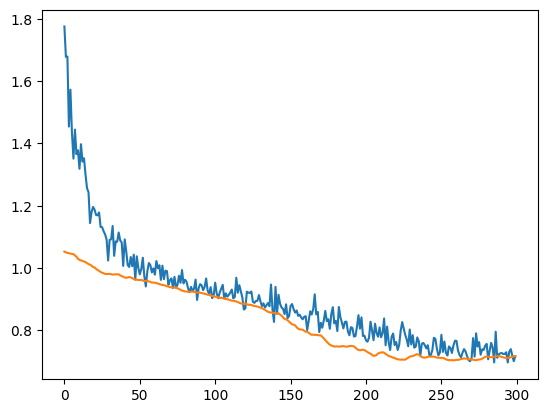

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

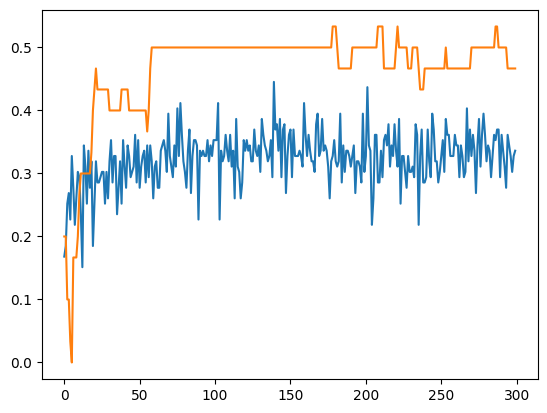

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [28]:
new_input= np.array([[0.02,0.025,0.027,0.031,0.04,0.049,0.053,0.055,0.062,0.065,0.069,0.09,220,230,256,313,325,396,398,401,425,436.56,440.486,490,100]])
new_input_scaled= scaler_x.transform(new_input)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
y_new_scaled= model.predict(new_input_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


In [30]:
y_new_actual= scaler_y.inverse_transform(y_new_scaled)

In [31]:
y_new_actual

array([[4.4935294e+02, 5.5968909e+02, 6.9783914e-01, 4.4837934e-03]],
      dtype=float32)

### Case 1

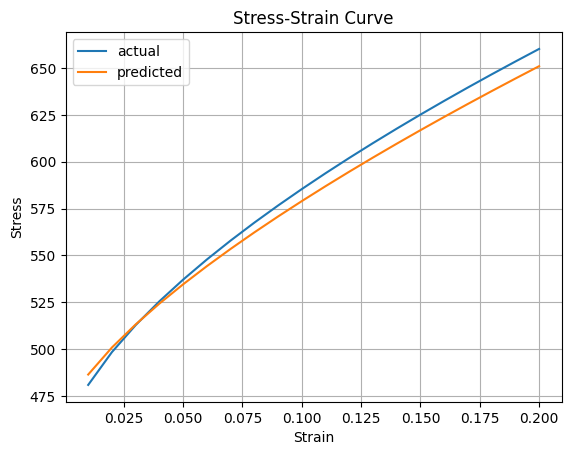

In [55]:
strain= np.linspace(0.01,0.2,20)
A1,B1,n1,C1= 437,567,0.630612,0.003980
strain_rate=1000 
A2,B2,n2,C2=4.4935294e+02 ,5.5968909e+02 ,6.9783914e-01 ,4.4837934e-03
stress1 = (A1 + B1 * (strain**n1)) * (1 + C1 * np.log(strain_rate))
stress2 = (A2 + B2 * (strain**n2)) * (1 + C2 * np.log(strain_rate))
# Plot both curves on the same graph
plt.plot(strain, stress1, label='actual')
plt.plot(strain, stress2, label='predicted')

# Customize the plot
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.title('Stress-Strain Curve')
plt.legend()
plt.grid(True)
plt.show()

### Case 2

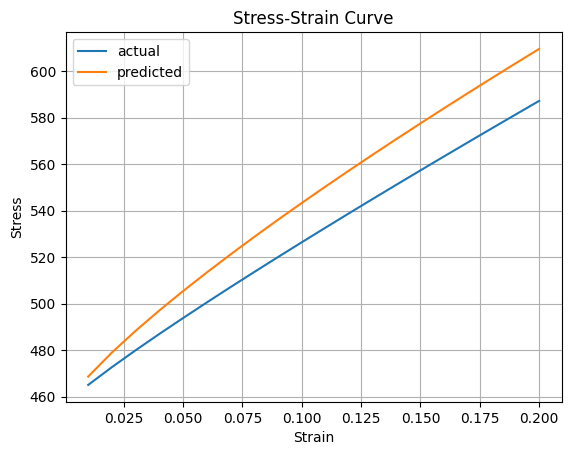

In [54]:
strain= np.linspace(0.01,0.2,20)
A2, B2, n2, C2=4.4935294e+02, 5.5968909e+02, 8.0631965e-01, 5.2911518e-03
strain_rate=10
A1,B1, n1, C1=450,	550,0.900000, 0.006000
stress1 = (A1 + B1 * (strain**n1)) * (1 + C1 * np.log(strain_rate))
stress2 = (A2 + B2 * (strain**n2)) * (1 + C2 * np.log(strain_rate))
# Plot both curves on the same graph
plt.plot(strain, stress1, label='actual')
plt.plot(strain, stress2, label='predicted')
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.title('Stress-Strain Curve')
plt.legend()
plt.grid(True)
plt.show()

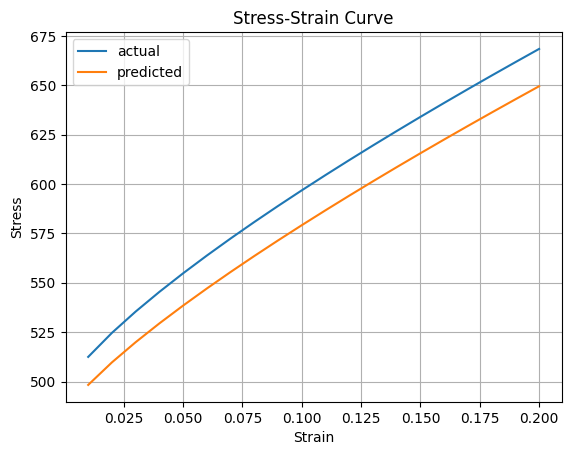

In [56]:
strain= np.linspace(0.01,0.2,20)
A2, B2, n2, C2= 4.7139130e+02, 5.8100244e+02, 7.8971905e-01, 5.1724412e-03
strain_rate=100
A1,B1, n1, C1= 484, 584,0.769388,0.005020
stress1 = (A1 + B1 * (strain**n1)) * (1 + C1 * np.log(strain_rate))
stress2 = (A2 + B2 * (strain**n2)) * (1 + C2 * np.log(strain_rate))
# Plot both curves on the same graph
plt.plot(strain, stress1, label='actual')
plt.plot(strain, stress2, label='predicted')
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.title('Stress-Strain Curve')
plt.legend()
plt.grid(True)
plt.show()